# examples using chronos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## search target coordinates

In [2]:
#search by toiid
t = cr.Target(toiid=200)
t.target_coord #note distance is also known for TOIs

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (354.91545833, -69.19604167, 44.0622)>

In [3]:
#ticid is automatically known
t.ticid

410214986

In [4]:
#search by ticid
t = cr.Target(ticid=410214986)
t.target_coord

TIC 410214986 is TOI 200!


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (354.91545833, -69.19604167, 44.0622)>

In [5]:
#toiid is retrieved if known TOI
t.toiid

200.01

In [6]:
#search by gaia id (recommended)
t = cr.Target(gaiaDR2id=5251470948229949568)
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (157.03746078, -64.50525936)>

In [7]:
#search by ra and dec
t = cr.Target(ra_deg=157.03729167, dec_deg=-64.50521111)
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (157.03729167, -64.50521111)>

In [8]:
#search by name
t = cr.Target(name='Pi Mensae')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (84.291188, -80.46911982)>

In [9]:
#name accepts EPIC
t = cr.Target(name='EPIC 201270176')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (170.132598, -2.902582)>

In [10]:
#name accepts K2
t = cr.Target(name='K2-33')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (242.56140783, -19.31927978)>

## search Gaia DR2 catalog

In [11]:
t = cr.Target(gaiaDR2id=5251470948229949568)
t.query_gaia_dr2_catalog(radius=5)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 5.0 arcsec.



,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
0,1635721458409799680,Gaia DR2 5251470948229949568,5251470948229949568,1500767781,2015.5,157.037281,0.020725,-64.505211,0.020265,6.989271,...,0.0065,0.1059,200111,1.049562,1.023889,1.089327,1.098632,1.092309,1.104955,0.005495
1,1635721458409799680,Gaia DR2 5251470948222139904,5251470948222139904,169326472,2015.5,157.035819,0.078785,-64.505082,0.108097,6.678713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043712
2,1635721458409799680,Gaia DR2 5251470948229949184,5251470948229949184,50362545,2015.5,157.039253,0.484003,-64.506375,0.590284,0.218503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081375


In [12]:
#return nearest position match
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

There are 2 gaia sources within 3.0 arcsec.


solution_id                         1635721458409799680
designation                Gaia DR2 5251470948229949568
source_id                           5251470948229949568
random_index                                 1500767781
ref_epoch                                        2015.5
                                       ...             
radius_percentile_upper                         1.08933
lum_val                                         1.09863
lum_percentile_lower                            1.09231
lum_percentile_upper                            1.10496
distance                                     0.00549491
Name: 0, Length: 95, dtype: object

In [13]:
#this is saved in gaia_params property
t.gaia_params

solution_id                         1635721458409799680
designation                Gaia DR2 5251470948229949568
source_id                           5251470948229949568
random_index                                 1500767781
ref_epoch                                        2015.5
                                       ...             
radius_percentile_upper                         1.08933
lum_val                                         1.09863
lum_percentile_lower                            1.09231
lum_percentile_upper                            1.10496
distance                                     0.00549491
Name: 0, Length: 95, dtype: object

In [14]:
#properties can be easily accessible
t.gaia_params.phot_g_mean_mag

10.3559618

## search TIC catalog

In [15]:
t = cr.Target(gaiaDR2id=5251470948229949568)
t.query_tic_catalog(radius=21) #21"~1 TESS pixel

Querying TIC catalog for 157.037 -64.5053
            within 21.0 arcsec.



,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
0,460205581,157.037461,-64.505259,-18.016500,11.306800,9.9322,STAR,tmgaia2,20190415,NaN,...,NaN,0.720185,0.578579,157.037281,-64.505211,0.020725,0.020265,1.0,0,0.000015
1,847769574,157.035998,-64.505139,-17.882300,13.026400,14.6304,STAR,gaia2,20190415,NaN,...,NaN,2.613303,2.767018,157.035819,-64.505082,0.078785,0.108097,NaN,0,2.308390
2,847769581,157.039280,-64.506381,-2.726400,1.312890,18.8111,STAR,gaia2,20190415,NaN,...,NaN,31.062549,26.177476,157.039253,-64.506375,0.484003,0.590284,NaN,0,4.923334
3,460205587,157.037153,-64.503754,-3.454460,2.432940,13.0687,STAR,tmgaia2,20190415,NaN,...,NaN,0.670007,0.480852,157.037118,-64.503743,0.019827,0.016880,0.0,0,5.442008
4,847769585,157.040234,-64.501723,7.146910,-10.465400,18.1557,STAR,gaia2,20190415,NaN,...,NaN,8.536804,6.479910,157.040305,-64.501768,0.210487,0.219392,1.0,0,13.437058
5,847769627,157.027619,-64.505263,-5.613080,4.541820,16.7610,STAR,gaia2,20190415,NaN,...,NaN,3.069764,2.419117,157.027563,-64.505243,0.084123,0.085744,1.0,0,15.249509
6,847769572,157.038972,-64.509546,-5.395230,2.896580,18.1274,STAR,gaia2,20190415,NaN,...,NaN,6.982370,5.506957,157.038918,-64.509533,0.184442,0.197915,1.0,0,15.608325
7,847769580,157.031846,-64.509027,NaN,NaN,20.5406,STAR,gaia2,20190415,NaN,...,NaN,2.200630,8.070872,157.031846,-64.509027,2.200630,8.070872,NaN,0,16.114219
8,847769602,157.047932,-64.506415,-7.855330,3.731110,17.9435,STAR,gaia2,20190415,NaN,...,NaN,6.736638,5.541250,157.047853,-64.506398,0.167094,0.181577,1.0,0,16.749075
9,847769573,157.044491,-64.508843,-3.782770,2.730920,19.0237,STAR,gaia2,20190415,NaN,...,NaN,10.892670,8.154198,157.044453,-64.508831,0.283480,0.290217,1.0,0,16.883263


In [16]:
#return nearest position match
t.query_tic_catalog(return_nearest_xmatch=True) 

Querying TIC catalog for 157.037 -64.5053
            within 3.0 arcsec.

There are 2 TIC stars within 3.0 arcsec


ID              460205581
ra                157.037
dec              -64.5053
pmRA             -18.0165
pmDEC             11.3068
                 ...     
e_RA_orig       0.0207253
e_Dec_orig      0.0202653
raddflag                1
wdflag                  0
dstArcSec     1.47538e-05
Name: 0, Length: 125, dtype: object

In [17]:
#properties can be easily accessible
t.tic_params.Tmag

9.9322

## validate catalog cross-match

In [18]:
t = cr.Target(gaiaDR2id=5251470948229949568)
#query nearest position match in gaia and tic catalogs
gaia_params = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
tic_params = t.query_tic_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

There are 2 gaia sources within 3.0 arcsec.
Querying TIC catalog for 157.037 -64.5053
            within 3.0 arcsec.

There are 2 TIC stars within 3.0 arcsec


In [19]:
#validate by comparing stellar properties e.g. magnitude, parallax, etc
t.validate_gaia_tic_xmatch()

Gaia and TIC catalog cross-match succeeded.


## estimate Av

In [20]:
t = cr.Target(gaiaDR2id=5251470948229949568)

In [21]:
t.target_coord.distance

<Quantity 1.>

In [22]:
#after cross-matching, parallax and hence distance is known
d=t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

There are 2 gaia sources within 3.0 arcsec.


In [23]:
t.target_coord.distance

<Distance 143.07643772 pc>

In [24]:
t.estimate_Av(map='sfd')

2.143053388595581

## estimate spectral type

In [25]:
t = cr.Target(gaiaDR2id=5251470948229949568)

In [26]:
#uses Monte Carlo 
spec_types, samples = t.get_spec_type(return_samples=True)
spec_types

Loaded: /home/jp/github/research/project/chronos/chronos/../data/mamajek_table.csv
Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

There are 2 gaia sources within 3.0 arcsec.
Querying TIC catalog for 157.037 -64.5053
            within 3.0 arcsec.

There are 2 TIC stars within 3.0 arcsec


'G2V'

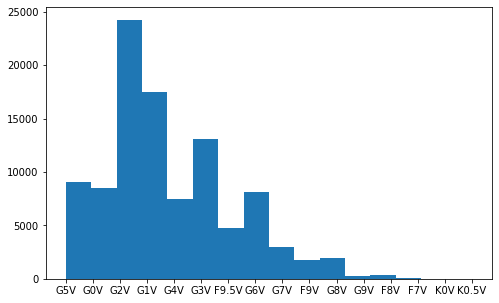

In [27]:
#plot
fig = pl.figure(figsize=(8,5))
nbins= len(np.unique(samples))
pl.hist(samples, bins=nbins);

## check HARPS RV bank

In [28]:
#useful to get RV measurements
t = cr.Target(toiid=200)
df = cr.get_harps_RV(t.target_coord)
df

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

There are 1 matches: ['HD222259']
                                                 1786
G [mag]                                           NaN
Dist [pc]                                        46.2
Data products (ascii)  HD222259_harps_all-data_v1.dat
Data products (csv)    HD222259_harps_all-data_v1.csv




,Target,RA,DEC,Sp. Type,T_eff [K],B [mag],V [mag],G [mag],Dist [pc],Data products (ascii),Data products (csv)
1786,HD222259,23:39:39.4804,-69:11:44.705,G6V+K3Ve,5597.5,9.19,8.226,NaN,46.2,HD222259_harps_all-data_v1.dat,HD222259_harps_all-data_v1.csv


## query ESO database

In [29]:
#useful to get spectra
t = cr.Target(ticid=410214986)
df = t.query_eso()

TIC 410214986 is TOI 200!
Searching ESO: (354.915 -69.196) with diameter=3.0 arcsec
Available data:
Instrument Nspectra  
HARPS      13        
UVES       3         

Found 16 ['UVES' 'HARPS'] spectra with SNR>1

There are 3 matches:
HD222259A : ra,dec=(354.915 -69.1958)
HD222259  : ra,dec=(354.915 -69.1958)
DSTuc     : failed to fetch coordinates


## query MAST

In [30]:
#useful to get data from other space telescope e.g. Spitzer, Galex if any
t = cr.Target(ticid=410214986)
df = t.query_mast()
df.head()

TIC 410214986 is TOI 200!
Searching MAST: (354.915 -69.196) with radius=3.0 arcsec
Available data: ['TESS/TESS', 'SPITZER_SHA/MIPS70', 'SPITZER_SHA/MIPS24', 'SPITZER_SHA/IRAC2', 'SPITZER_SHA/IRAC1', 'HLSP/TESS', 'GALEX/FUV', 'GALEX/NUV'] in ['Optical', 'Infrared', 'UV']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,distance
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0001-3-2,...,1.0,POLYGON 352.51527500 -64.91754900 19.13202600 ...,NaN,NaN,PUBLIC,False,NaN,17000035426,17003534430,0.000000
1,science,TESS,SPOC,Photometer,TESS,TESS,Optical,410214986,NaN,tess2018206045859-s0001-0000000410214986-0120-s,...,1.0,CIRCLE ICRS 354.91455600 -69.19578700 0.00138889,NaN,mast:TESS/product/tess2018206045859-s0001-0000...,PUBLIC,False,NaN,17000008100,17001684524,0.000000
2,science,TESS,SPOC,Photometer,TESS,TESS,Optical,410214984,NaN,tess2018206045859-s0001-0000000410214984-0120-s,...,1.0,CIRCLE ICRS 354.91368900 -69.19433700 0.00138889,NaN,mast:TESS/product/tess2018206045859-s0001-0000...,PUBLIC,False,NaN,17000001563,17001684592,1.556626
3,science,SPITZER_SHA,SSC Pipeline,MIPS,NaN,MIPS70,Infrared,HIP116748,NaN,000000459C00,...,4561920.0,POLYGON ICRS -4.79581500 -69.20565900 -5.04448...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000020946,19006043025,0.000000
4,science,SPITZER_SHA,SSC Pipeline,MIPS,NaN,MIPS24,Infrared,HIP116748,NaN,000000459C00,...,4561920.0,POLYGON ICRS -4.72141000 -69.18714500 -5.04659...,NaN,https://irsa.ipac.caltech.edu/data/SPITZER/SHA...,PUBLIC,False,NaN,19000020946,19006039620,0.000000


## query Simbad

In [31]:
#useful to get values from literature e.g. Vsini, 
t = cr.Target(ticid=410214986)
df = t.query_simbad()
df.head()

TIC 410214986 is TOI 200!
Searching MAST: (<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (354.91545833, -69.19604167, 44.0622)>) with radius=3.0 arcsec


,MAIN_ID,RA,DEC,COO_BIBCODE,TYPED_ID,OTYPE,SP_TYPE,SP_QUAL,SP_BIBCODE,ROT_upVsini,ROT_Vsini,ROT_err,ROT_mes,ROT_qual,ROT_bibcode,MK_ds,MK_mss,MK_Spectral_type,MK_bibcode
0,b'HD 222259A',23 39 39.4809,-69 11 44.709,b'2018yCat.1345....0G',b'',b'PM*',b'G6V',C,b'2006A&A...460..695T',,18.299999,0.3,0,C,2006A&A...460..695T,,,b'G6V',2006A&A...460..695T
1,b'HD 222259Ab',23 39 39.4809,-69 11 44.709,b'2018yCat.1345....0G',b'',b'Planet?',b'',,b'',,NaN,NaN,0,,,,,b'',
2,b'HD 222259',23 39 39.4804,-69 11 44.705,b'2007A&A...474..653V',b'',b'RSCVn',b'G6V+K3Ve',C,b'2006A&A...460..695T',,NaN,NaN,0,,,,,b'G6V+K3Ve',2006A&A...460..695T


## query Vizier

In [32]:
#useful to get tables from literature
t = cr.Target(ticid=410214986)
tables = t.query_vizier()

#return the first 10
tables

TIC 410214986 is TOI 200!
Searching Vizier: (354.915 -69.196) with radius=3.0 arcsec
119 tables found.


TableList with 119 tables:
	'0:I/239/hip_main' with 15 column(s) and 1 row(s) 
	'1:I/239/h_dm_com' with 13 column(s) and 1 row(s) 
	'2:I/239/tyc_main' with 12 column(s) and 1 row(s) 
	'3:I/250/catalog' with 11 column(s) and 1 row(s) 
	'4:I/252/out' with 9 column(s) and 1 row(s) 
	'5:I/259/tyc2' with 11 column(s) and 1 row(s) 
	'6:I/271/out' with 12 column(s) and 1 row(s) 
	'7:I/276/catalog' with 16 column(s) and 1 row(s) 
	'8:I/280B/ascc' with 13 column(s) and 1 row(s) 
	'9:I/284/out' with 15 column(s) and 1 row(s) 
	'10:I/294A/ucac2bss' with 13 column(s) and 1 row(s) 
	'11:I/297/out' with 20 column(s) and 1 row(s) 
	'12:I/305/out' with 12 column(s) and 5 row(s) 
	'13:I/311/hip2' with 14 column(s) and 1 row(s) 
	'14:I/312/sample' with 14 column(s) and 1 row(s) 
	'15:I/317/sample' with 14 column(s) and 1 row(s) 
	'16:I/320/spm4' with 22 column(s) and 1 row(s) 
	'17:I/322A/out' with 25 column(s) and 1 row(s) 
	'18:I/324/igsl3' with 19 column(s) and 2 row(s) 
	'19:I/337/gaia' with 15 colu

In [33]:
#check the first table
tables[0]

_r,HIP,RAhms,DEdms,Vmag,RAICRS,DEICRS,Plx,pmRA,pmDE,e_Plx,B-V,Notes,_RA.icrs,_DE.icrs
arcsec,,,,mag,deg,deg,mas,mas / yr,mas / yr,mas,mag,,deg,deg
float64,int32,bytes11,bytes11,float32,float64,float64,float32,float64,float64,float32,float32,bytes1,float64,float64
2.508,116748,23 39 39.35,-69 11 44.1,8.17,354.91395712,-69.19558694,21.64,79.04,-67.11,1.32,0.780,,354.91449801,-69.19575005


## search TESS

* check which TESS sector: https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py or using [tess-point](https://github.com/christopherburke/tess-point)
* check schedule here: https://tess.mit.edu/observations/